In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
portfolio1 = pd.read_csv('../data/raw/estaticos_portfolio1.csv')
portfolio2 = pd.read_csv('../data/raw/estaticos_portfolio2.csv')
portfolio3 = pd.read_csv('../data/raw/estaticos_portfolio3.csv')
market     = pd.read_csv('../data/raw/estaticos_market.csv.gz', compression='gzip')

In [3]:
names = ['portfolio1', 'portfolio2', 'portfolio3', 'market']
dfs   = [portfolio1, portfolio2, portfolio3, market]
for name, df in zip(names, dfs) :
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    print(name, 'has {} rows and {} columns'.format(*df.shape))

portfolio1 has 555 rows and 181 columns
portfolio2 has 566 rows and 1 columns
portfolio3 has 265 rows and 1 columns
market has 462298 rows and 181 columns


In [4]:
def get_metadata(df, features=None):
    df = df.copy()
    if features is None:
        features = list(df.columns)
    total_missing = df[features].isna().sum()
    percent_missing = (df[features].isna().sum()/df[features].isna().count())
    distinct_values = df.nunique(dropna=False)
    types = df.dtypes
    meta_data = pd.concat([total_missing, percent_missing, distinct_values, types],
                          axis=1, keys=['Total Missing', 'Percent Missing', 'Distinct Values', 'Type'])
    return meta_data.sort_values('Percent Missing', ascending=False)

In [5]:
metadata = get_metadata(market)
metadata['Percent Missing'].unique()

array([1.00000000e+00, 9.99705817e-01, 9.99619293e-01, 9.99394330e-01,
       9.99273196e-01, 9.96192932e-01, 9.95924707e-01, 9.93714011e-01,
       9.92967739e-01, 9.92033277e-01, 9.90170842e-01, 9.85745125e-01,
       9.85414170e-01, 9.76149583e-01, 9.69770581e-01, 9.58820934e-01,
       9.55872619e-01, 9.50839069e-01, 9.47674444e-01, 9.47458133e-01,
       9.46147290e-01, 9.43997162e-01, 9.34224245e-01, 9.33627227e-01,
       9.21448936e-01, 9.20966563e-01, 9.20551246e-01, 9.15865957e-01,
       9.13166399e-01, 9.08494088e-01, 9.05054748e-01, 8.92831031e-01,
       8.91344977e-01, 8.60429853e-01, 8.59080074e-01, 8.58552276e-01,
       8.53347841e-01, 8.40172356e-01, 8.39899805e-01, 8.35729335e-01,
       8.35039304e-01, 7.75988648e-01, 7.75958365e-01, 7.50693276e-01,
       7.50673808e-01, 6.86286767e-01, 5.77945395e-01, 3.35102034e-01,
       3.27931334e-01, 3.11117504e-01, 2.48954138e-01, 1.78917062e-01,
       1.26970050e-01, 9.79368286e-02, 5.95135605e-02, 3.21243008e-02,
      

**Getting Features Below 60% of Missing Values**

In [6]:
use_features = list(metadata[metadata['Percent Missing'] < .60].index)
df_market = market[use_features].reset_index()

In [7]:
df_market_meta = get_metadata(df_market)
df_market_meta[df_market_meta['Total Missing'] > 0]

,Total Missing,Percent Missing,Distinct Values,Type
qt_socios_masculino,267183,0.577945,42,float64
qt_socios_st_regular,154917,0.335102,55,float64
idade_minima_socios,151602,0.327931,115,float64
idade_media_socios,151602,0.327931,1011,float64
idade_maxima_socios,151602,0.327931,119,float64
empsetorcensitariofaixarendapopulacao,143829,0.311118,15420,float64
qt_socios,115091,0.248954,63,float64
qt_socios_pj,115091,0.248954,13,float64
qt_socios_pf,115091,0.248954,65,float64
fl_optante_simples,82713,0.178917,3,object


In [8]:
def plot_histograms(df, cols, bins=20, nrows=4, ncols=4, figsize=(16,10), log=False):
    df = df.copy()
    fig = plt.figure(figsize=figsize)
    
    for col, num in zip(cols, range(1, len(cols) + 1)):
        ax = fig.add_subplot(nrows,ncols,num)
        if log:
            ax.hist(np.log1p(df[col]), bins=bins)
            ax.set_title(col + ' Log')
        else:
            ax.hist(df[col], bins=bins)
            ax.set_title(col)
    plt.tight_layout()
    plt.show()

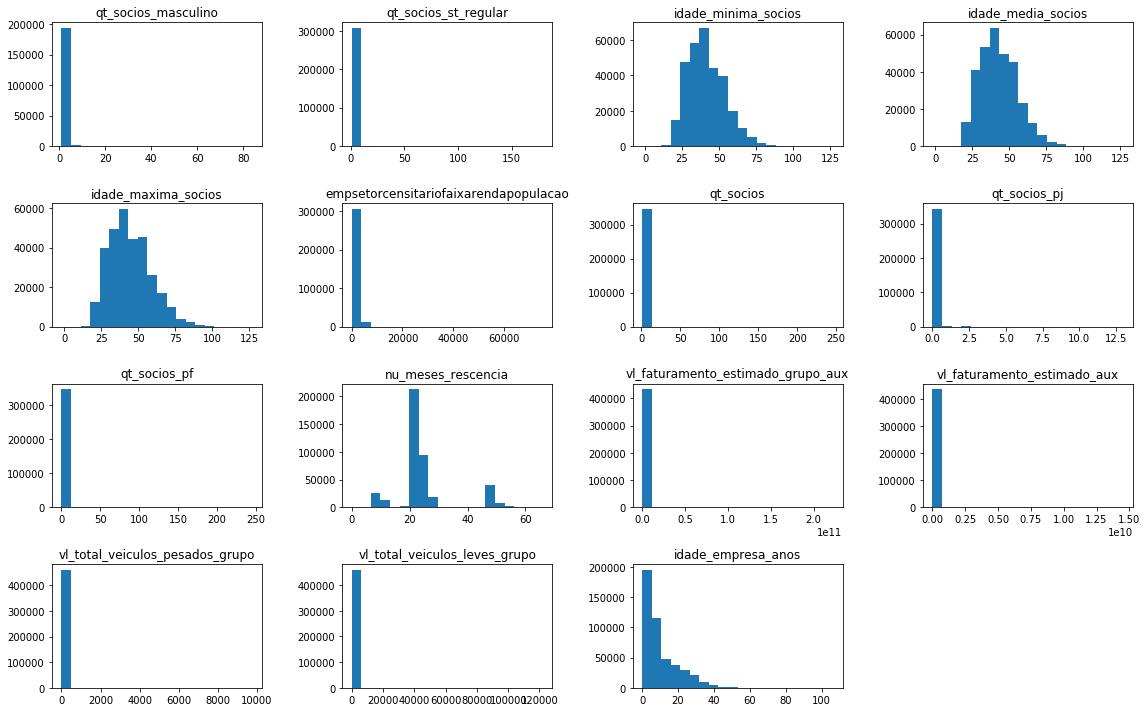

In [9]:
cols_float = list(df_market_meta[df_market_meta['Type'] == 'float64'].index)
cols_int   = list(df_market_meta[df_market_meta['Type'] == 'int64'].index)
cols_obj   = list(df_market_meta[df_market_meta['Type'] == 'object'].index)
cols_obj.remove('id')

plot_histograms(df_market, cols_float)

In [10]:
for col in cols_float:
    print('=' * 80)
    print(col, 'unique values:', len(df_market[col].unique()))
    print('Examples:', df_market[col].unique()[:5])
print('=' * 80)

qt_socios_masculino unique values: 42
Examples: [ 2.  1. nan 32.  3.]
qt_socios_st_regular unique values: 55
Examples: [ 2.  1. nan  3. 34.]
idade_minima_socios unique values: 115
Examples: [41. 27. 32. 36. nan]
idade_media_socios unique values: 1011
Examples: [44. 27. 32. 36. nan]
idade_maxima_socios unique values: 119
Examples: [47. 27. 32. 36. nan]
empsetorcensitariofaixarendapopulacao unique values: 15420
Examples: [    nan  468.93  713.5   475.73 2874.04]
qt_socios unique values: 63
Examples: [ 2.  1. nan  3. 37.]
qt_socios_pj unique values: 13
Examples: [ 0. nan  1.  2.  3.]
qt_socios_pf unique values: 65
Examples: [ 2.  1. nan  3. 37.]
nu_meses_rescencia unique values: 52
Examples: [23.  9. 26. 27. 48.]
vl_faturamento_estimado_grupo_aux unique values: 6795
Examples: [3132172.8  210000.    50000.        nan  840000. ]
vl_faturamento_estimado_aux unique values: 1921
Examples: [3132172.8  210000.    50000.        nan 1978214.4]
vl_total_veiculos_pesados_grupo unique values: 297
Exa

In [11]:
cols_int = ['qt_socios_masculino','qt_socios_st_regular','idade_minima_socios','idade_media_socios','idade_maxima_socios',\
            'qt_socios','qt_socios_pj','qt_socios_pf','nu_meses_rescencia','vl_total_veiculos_pesados_grupo','vl_total_veiculos_leves_grupo']

for col in [cols_int]:
    df_market[col] = df_market[col].fillna(0).astype(int)

In [12]:
cols_float = list(set(cols_float) - set(cols_int))

In [13]:
cols_float

['idade_empresa_anos',
 'empsetorcensitariofaixarendapopulacao',
 'vl_faturamento_estimado_grupo_aux',
 'vl_faturamento_estimado_aux']

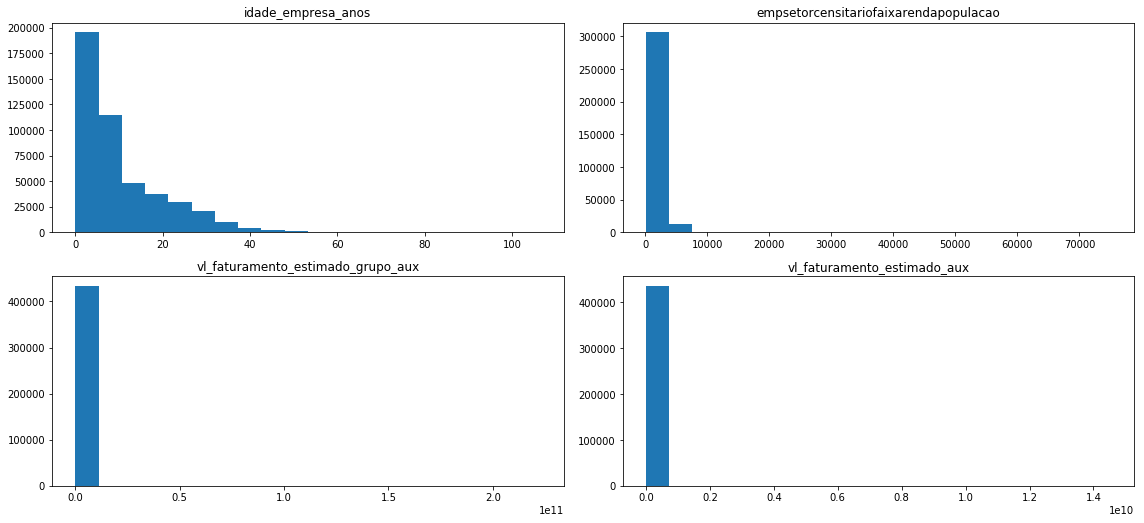

In [14]:
plot_histograms(df_market, cols_float, ncols=2, figsize=(16,14))

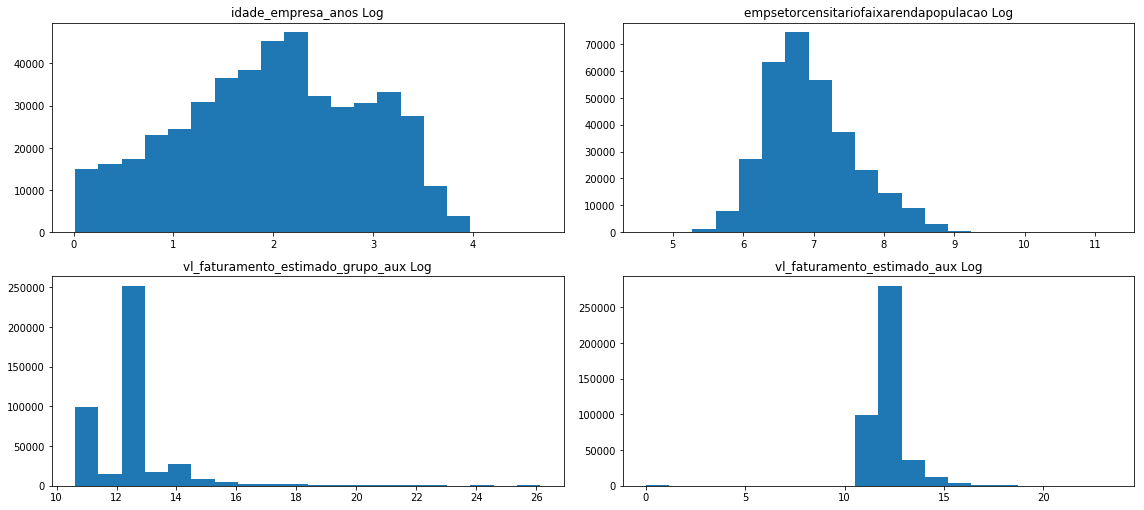

In [15]:
plot_histograms(df_market, cols_float, ncols=2, figsize=(16,14), log=True)

In [16]:
for col in cols_obj:
    print('=' * 110)
    print(col, 'unique values:', len(df_market[col].unique()))
    print('Any missing?:', df_market[col].isna().any())
    print('Examples:', df_market[col].unique()[:7])
print('=' * 110)

fl_optante_simples unique values: 3
Any missing?: True
Examples: [True nan False]
fl_optante_simei unique values: 3
Any missing?: True
Examples: [False nan True]
nm_micro_regiao unique values: 74
Any missing?: True
Examples: ['NATAL' 'TERESINA' 'MANAUS' 'PAU DOS FERROS'
 'AGLOMERACAO URBANA DE SAO LUIS' 'PARINTINS' 'MOSSORO']
nm_meso_regiao unique values: 20
Any missing?: True
Examples: ['LESTE POTIGUAR' 'CENTRO NORTE PIAUIENSE' 'CENTRO AMAZONENSE'
 'OESTE POTIGUAR' 'NORTE MARANHENSE' nan 'NORTE PIAUIENSE']
de_faixa_faturamento_estimado_grupo unique values: 12
Any missing?: True
Examples: ['DE R$ 1.500.000,01 A R$ 4.800.000,00' 'DE R$ 81.000,01 A R$ 360.000,00'
 'ATE R$ 81.000,00' nan 'DE R$ 360.000,01 A R$ 1.500.000,00'
 'DE R$ 500.000.000,01 A 1 BILHAO DE REAIS' 'ACIMA DE 1 BILHAO DE REAIS']
de_faixa_faturamento_estimado unique values: 13
Any missing?: True
Examples: ['DE R$ 1.500.000,01 A R$ 4.800.000,00' 'DE R$ 81.000,01 A R$ 360.000,00'
 'ATE R$ 81.000,00' nan 'DE R$ 360.000,01 A 

In [35]:
n_lines = len(df_market['fl_optante_simples'].unique())
df_grouped = df_market['fl_optante_simples'].value_counts(dropna=False).to_frame().head(n_lines)
df_grouped

,fl_optante_simples
True,199617
False,179968
NaN,82713


In [58]:
def plot_bars(df, cols, nrows=5, ncols=5, figsize=(30,15)):
    df = df.copy()
    
    fig = plt.figure(figsize=figsize)
    for col, num in zip(cols, range(1, len(cols) + 1)):
        ax = fig.add_subplot(nrows,ncols,num)
        
        if len(df[col].unique()) > 10:
            n_lines = 10
            title = 'Top {} Categories for {} Count'.format(n_lines, col)
        else:
            n_lines = len(df[col].unique())
            title   = 'Categories for {} Count'.format(col)

        df_grouped = df[col].value_counts(dropna=False).to_frame().head(n_lines)
        ax.bar(list(map(str,df_grouped.index.fillna('Missing'))), df_grouped[col])
        ax.set_title(title)
    plt.tight_layout()
    plt.show()

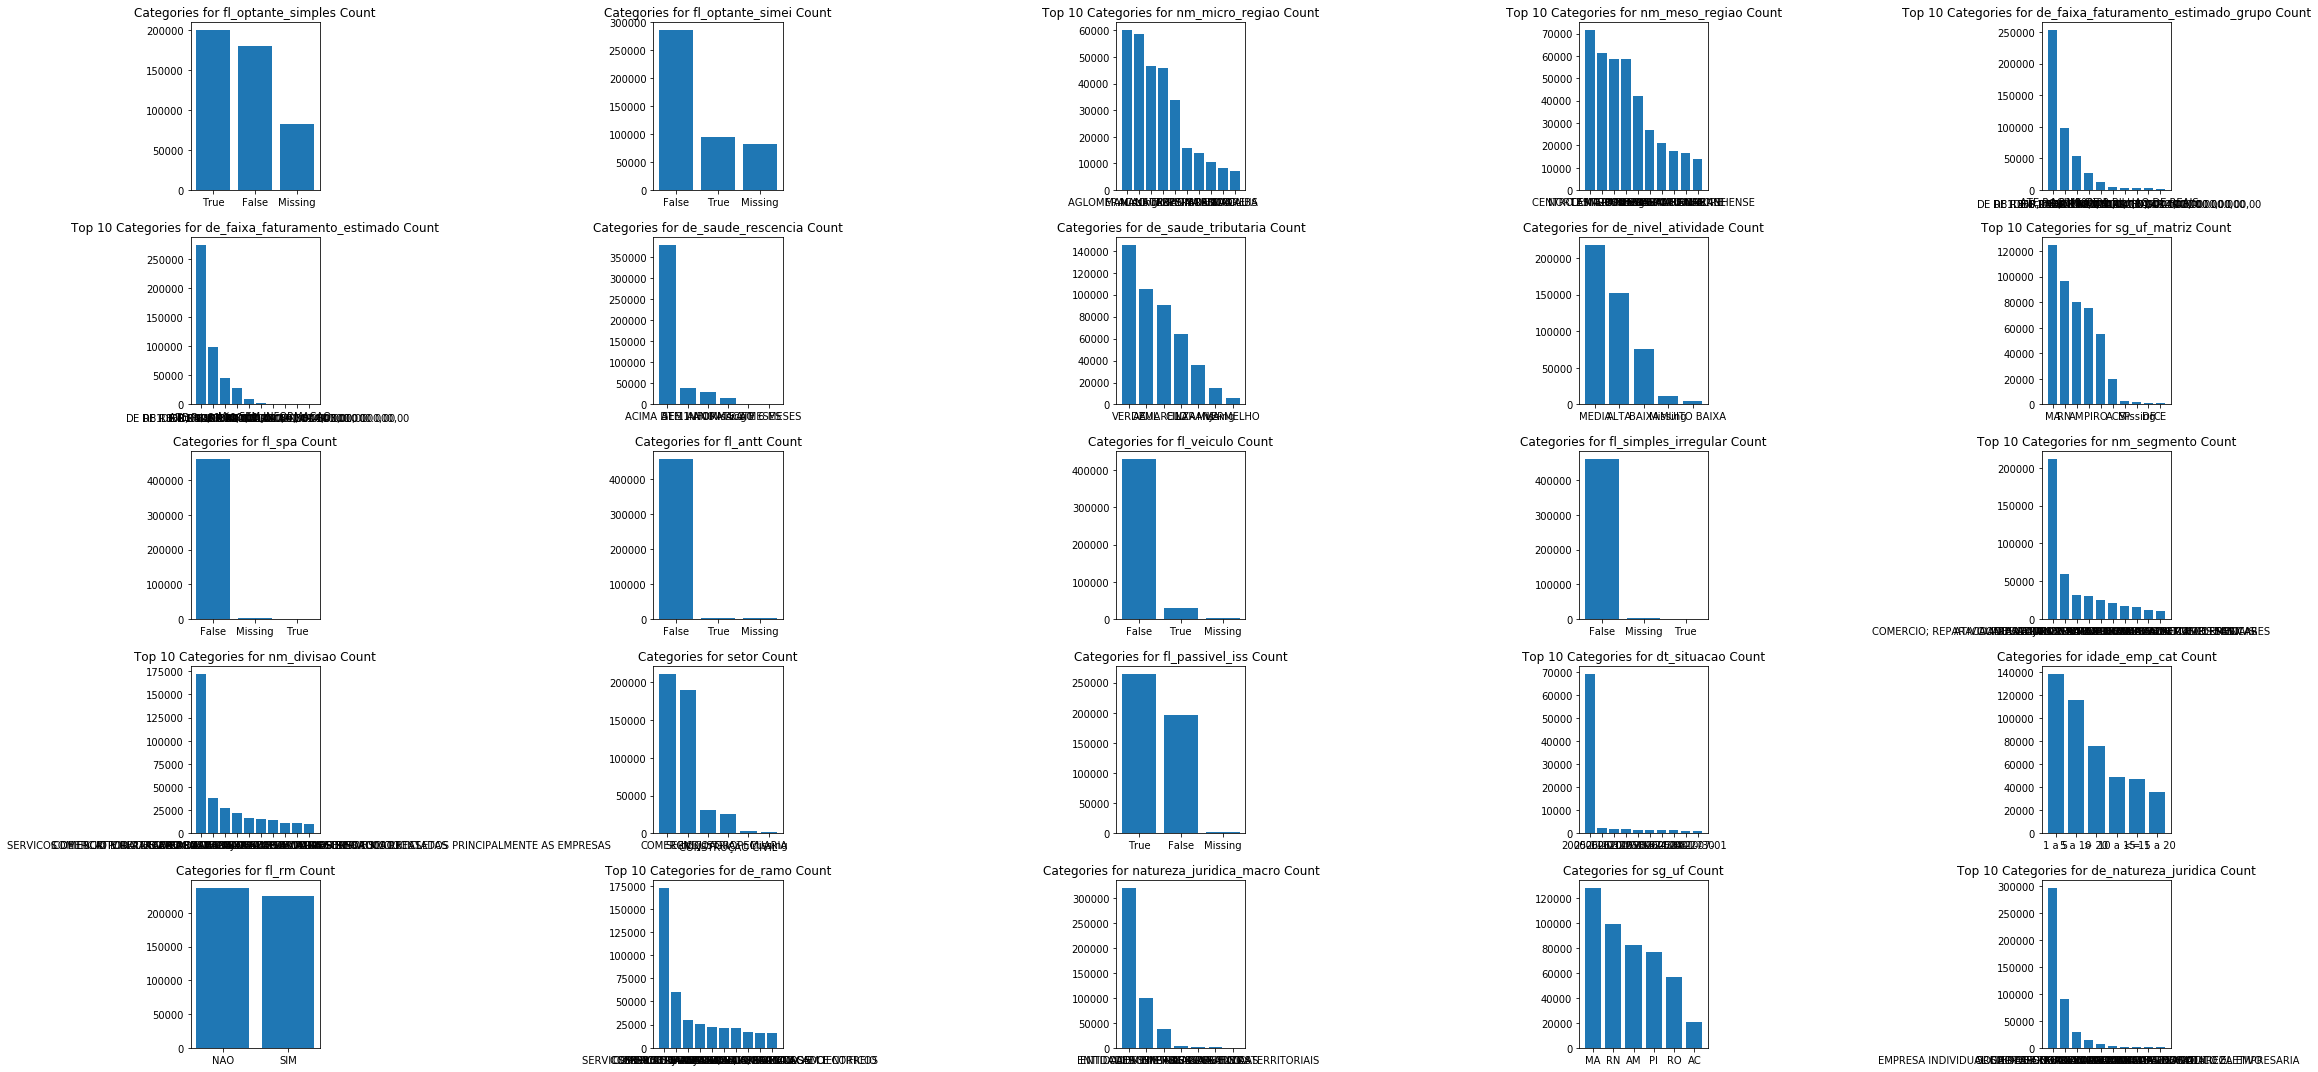

In [59]:
plot_bars(df_market, cols_obj)